# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
#Generating list for holding Latitude, Longitude, and Cities
lats_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats_lngs = zip(lats, lngs)

saved_lats = []
saved_lngs = []

for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_lngs.append(lat_lng[1])
        
len(cities)
print("{} cities have been identified to poll for weather.".format(len(cities)))

638 cities have been identified to poll for weather.


In [11]:
#Creating a DataFrame of Cities
city_list = pd.DataFrame({"City":cities, "Approximate Latitude":saved_lats, "Approximate Longitude":saved_lngs})
city_list.head()

,City,Approximate Latitude,Approximate Longitude
0,saint-joseph,-35.591553,56.691892
1,gilgit,36.399801,73.333392
2,fernie,49.742892,-115.285624
3,tiksi,83.255784,125.049610
4,torbay,42.359538,-49.489684


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [13]:
#Data Retrieval
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")



Processing Record 1 of Set 1 : saint-joseph
Processing Record 2 of Set 1 : gilgit
Processing Record 3 of Set 1 : fernie
Processing Record 4 of Set 1 : tiksi
Processing Record 5 of Set 1 : torbay
Processing Record 6 of Set 1 : hobart
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : ribeira grande
Processing Record 9 of Set 1 : kampot
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 1 : port macquarie
Processing Record 11 of Set 1 : panguipulli
Processing Record 12 of Set 1 : ventspils
Processing Record 13 of Set 1 : northam
Processing Record 14 of Set 1 : sao filipe
Processing Record 15 of Set 1 : nyanguge
Processing Record 16 of Set 1 : norman wells
Processing Record 17 of Set 1 : rikitea
Processing Record 18 of Set 1 : tuktoyaktuk
Processing Record 19 of Set 1 : kloulklubed
Processing Record 20 of Set 1 : nemuro
Processing Record 21 of Set 1 : nikolskoye
Processing Record 22 of Set 1 : hithadhoo
Processing Record 23 of Set 1 : al

Processing Record 35 of Set 4 : kyshtovka
City not found. Skipping...
Processing Record 36 of Set 4 : banjar
Processing Record 37 of Set 4 : seoul
City not found. Skipping...
Processing Record 38 of Set 4 : half moon bay
Processing Record 39 of Set 4 : tasiilaq
Processing Record 40 of Set 4 : great yarmouth
Processing Record 41 of Set 4 : kodiak
Processing Record 42 of Set 4 : gwanda
Processing Record 43 of Set 4 : gariaband
City not found. Skipping...
Processing Record 44 of Set 4 : rio gallegos
Processing Record 45 of Set 4 : lagunas
Processing Record 46 of Set 4 : sebring
Processing Record 47 of Set 4 : arya
City not found. Skipping...
Processing Record 48 of Set 4 : peniche
Processing Record 49 of Set 4 : esperance
Processing Record 50 of Set 4 : grindavik
Processing Record 0 of Set 5 : pisco
Processing Record 1 of Set 5 : la palma
Processing Record 2 of Set 5 : baghdad
Processing Record 3 of Set 5 : dagda
Processing Record 4 of Set 5 : port elizabeth
Processing Record 5 of Set 5 :

Processing Record 18 of Set 8 : san clemente
Processing Record 19 of Set 8 : hay river
Processing Record 20 of Set 8 : kanniyakumari
Processing Record 21 of Set 8 : pombia
Processing Record 22 of Set 8 : araouane
Processing Record 23 of Set 8 : bayan
City not found. Skipping...
Processing Record 24 of Set 8 : majalgaon
Processing Record 25 of Set 8 : fomboni
Processing Record 26 of Set 8 : rabaul
Processing Record 27 of Set 8 : golyshmanovo
Processing Record 28 of Set 8 : banda aceh
Processing Record 29 of Set 8 : binzhou
Processing Record 30 of Set 8 : igarka
City not found. Skipping...
Processing Record 31 of Set 8 : vidim
Processing Record 32 of Set 8 : umuarama
Processing Record 33 of Set 8 : cherdyn
Processing Record 34 of Set 8 : cap malheureux
Processing Record 35 of Set 8 : vostok
Processing Record 36 of Set 8 : olafsvik
Processing Record 37 of Set 8 : berlevag
Processing Record 38 of Set 8 : porbandar
Processing Record 39 of Set 8 : waddan
Processing Record 40 of Set 8 : poron

Processing Record 0 of Set 12 : turukhansk
Processing Record 1 of Set 12 : kewanee
Processing Record 2 of Set 12 : burgeo
Processing Record 3 of Set 12 : vytegra
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 12 : brownwood
City not found. Skipping...
Processing Record 5 of Set 12 : dwarka
City not found. Skipping...
Processing Record 6 of Set 12 : sovetskiy
City not found. Skipping...
Processing Record 7 of Set 12 : blagoveshchenka
Processing Record 8 of Set 12 : punta gorda
Processing Record 9 of Set 12 : manuk mangkaw
Processing Record 10 of Set 12 : kilakarai
Processing Record 11 of Set 12 : tuyen quang
Processing Record 12 of Set 12 : zhezkazgan
Processing Record 13 of Set 12 : rio grande
Processing Record 14 of Set 12 : anta
Processing Record 15 of Set 12 : odessa
Processing Record 16 of Set 12 : te anau
Processing Record 17 of Set 12 : kenora
Processing Record 18 of Set 12 : almaznyy
Processing Record 19 of Set 12 : itarema
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Creating DataFrame
weather_dict = pd.DataFrame({
    "City": city_name_list,
    "Cloudiness": cloudiness_list,
    "Country": country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Latitude": lat_list,
    "Longitude": lng_list,
    "Max Temperature": max_temp_list,
    "Wind Speed (mph)": wind_speed_list
})

In [15]:
weather_dict.count()

City                581
Cloudiness          581
Country             581
Date                581
Humidity            581
Latitude            581
Longitude           581
Max Temperature     581
Wind Speed (mph)    581
dtype: int64

In [16]:
#Display DataFrame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed (mph)
0,Saint-Joseph,12,RE,1666748554,70,-21.3667,55.6167,66.58,9.66
1,Gilgit,2,PK,1666748554,43,35.9221,74.3087,57.40,1.66
2,Fernie,100,CA,1666748554,94,49.5000,-115.0687,39.29,5.03
3,Tiksi,100,RU,1666748496,88,71.6872,128.8694,17.85,14.99
4,Torbay,20,CA,1666748555,87,47.6666,-52.7314,55.27,14.97
...,...,...,...,...,...,...,...,...,...
576,Te Anau,100,NZ,1666748546,80,-45.4167,167.7167,55.24,5.57
577,Kenora,75,CA,1666748523,80,49.8167,-94.4337,32.97,8.05
578,Almaznyy,100,RU,1666748750,85,48.0448,40.0450,48.54,7.65
579,Itarema,100,BR,1666748750,77,-2.9248,-39.9167,78.37,13.13


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
humidity_cities = weather_dict["Humidity"].describe(include="all")
print(humidity_cities)
print("Based on the statistics above, we can confirm that there are no cities in our Data Frame with Humidity Levels Above 100%")

count    581.000000
mean      74.061962
std       19.036071
min       13.000000
25%       64.000000
50%       79.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64
Based on the statistics above, we can confirm that there are no cities in our Data Frame with Humidity Levels Above 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

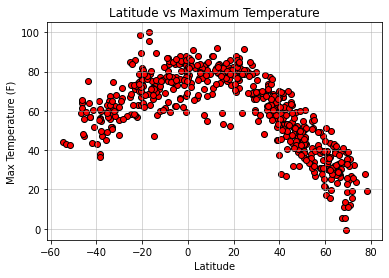

In [9]:
#Creating a Scatter Plot to Look at Latitude vs Temperature
plt.scatter(weather_dict["Latitude"], weather_dict["Max Temperature"], color = "red", edgecolor = "black")

#Formatting Scatter Plot
plt.title("Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("../Images/Latitude vs Maximum Temperature.png")

plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

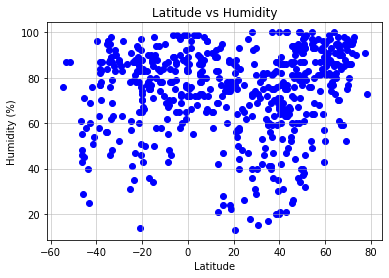

In [10]:
#Create a Scatter Plot showi Latitude vs Humidity 
plt.scatter(weather_dict["Latitude"], weather_dict["Humidity"], color= "blue")

#Formatting
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("../Images/Latitude vs Humidity.png")

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

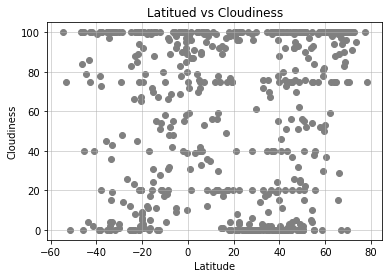

In [11]:
#Generate a Scatter Plot showing Latitude vs Cloudiness
plt.scatter(weather_dict["Latitude"], weather_dict["Cloudiness"], color = 'gray')

#Formatting
plt.title("Latitued vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle = '-', linewidth=1, alpha=0.5)
plt.savefig("../Images/Latitude vs Cloudiness.png")

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

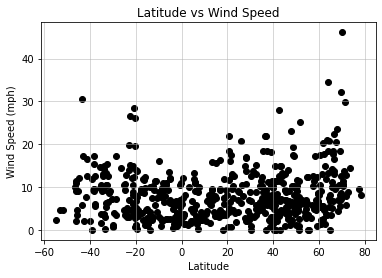

In [12]:
#Generate a Scatter Plot showing Latitude vs Wind Speed in mph
plt.scatter(weather_dict["Latitude"], weather_dict["Wind Speed (mph)"], color = 'black')

#Formatting
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle = '-', linewidth=1, alpha=0.5)
plt.savefig("../Images/Latitude vs Wind Speed.png")

plt.show

## Linear Regression

In [13]:
#Create DataFrames seperating the Northern and Southern Hemispheres
northern_hemisphere = weather_dict.loc[weather_dict["Latitude"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Latitude"] < 0]

In [14]:
#Define linear regression function for the scatter plots
def linear_regression(x,y):
    print(f"The r-squared is: {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values,"r-")
    return line_eq
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize=16, color='orange')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.89


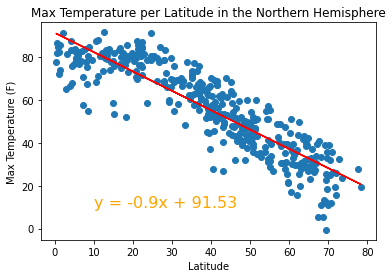

In [15]:
#For the Max Temp vs Lat Linear Regression in the Northern Hemisphere
equation = linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Max Temperature"])
annotate(equation, 10, 10)

#Formatting
plt.title("Max Temperature per Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/Max Temperature vs Latitude in the Northern Hemishpere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.66


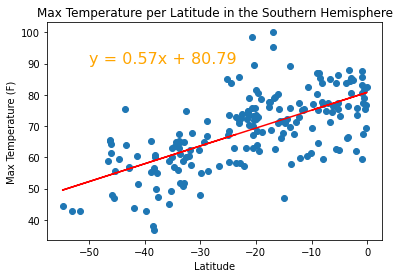

In [16]:
#For the Max Temp vs Lat Linear Regression in the Southern Hemisphere
equation = linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Max Temperature"])
annotate(equation, -50, 90)

#Formatting
plt.title("Max Temperature per Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/Max Temperature vs Latitude in the Southern Hemishpere.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21


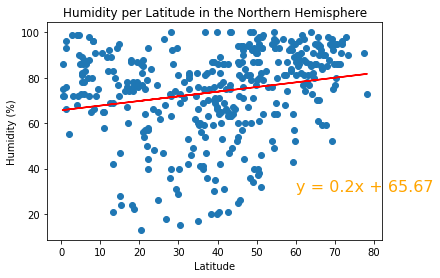

In [18]:
#For the Humidity vs Lat Linear Regression in the Northern Hemisphere
equation = linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])
annotate(equation, 60, 30)

#Formatting
plt.title("Humidity per Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Humidity vs Latitude in the Northern Hemishpere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2


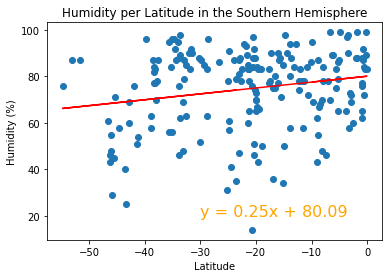

In [19]:
#For the Humidity vs Lat Linear Regression in the Southern Hemisphere
equation = linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])
annotate(equation, -30, 20)

#Formatting
plt.title("Humidity per Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Humidity vs Latitude in the Southern Hemishpere.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23


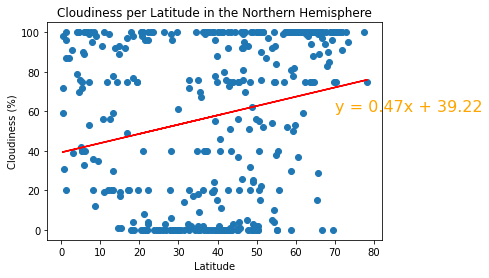

In [21]:
#For the Cloudiness(%) vs Lat Linear Regression in the Northern Hemisphere
equation = linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])
annotate(equation, 70, 60)

#Formatting
plt.title("Cloudiness per Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Cloudiness vs Latitude in the Northern Hemishpere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07


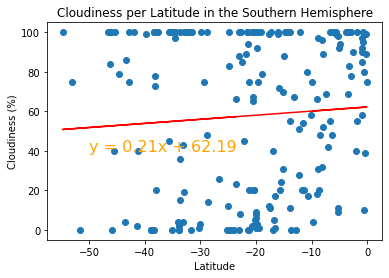

In [22]:
#For the Cloudiness(%) vs Lat Linear Regression in the Southern Hemisphere
equation = linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])
annotate(equation, -50, 40)

#Formatting
plt.title("Cloudiness per Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Cloudiness vs Latitude in the Southern Hemishpere.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24


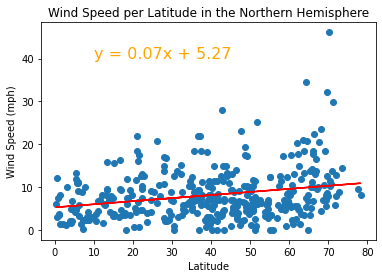

In [23]:
#For the Wind Speed (mph) vs Lat Linear Regression in the Northern Hemisphere
equation = linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed (mph)"])
annotate(equation, 10, 40)

#Formatting
plt.title("Wind Speed per Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Wind Speed vs Latitude in the Northern Hemishpere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21


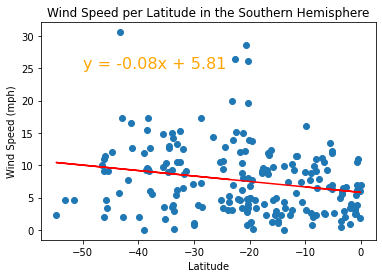

In [24]:
#For the Wind Speed (mph) vs Lat Linear Regression in the Southern Hemisphere
equation = linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed (mph)"])
annotate(equation, -50, 25)

#Formatting
plt.title("Wind Speed per Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Wind Speed vs Latitude in the Southern Hemishpere.png")

In [ ]:
#### Analysis
#1 - Based on the graphs I was able to produce, it does not look like Latitude position and Humidity are correlated at all.  This is not unusual because we know that humidity is caused by open water around an area, and since oceans are all around the world, as well as lakes, rivers, and other bodies of water, humidity level is not affected by latitude
#2 - Based on the graphs looking at Max Temperature vs Latitude, we can assume that as you get closer to the equator (0), the average maximum temperature increases.
#3 - Based on the graphs for Wind Speed vs Latitude, we can estimate that the wind speeds are going to be higher the farther away from the equator (0) we travel.  Although the windspeed in the Southern Hemisphere is seeming going down because the values are negative, we have to remember that the South Pole is the "smallest" latitdue we have since it is "below zero" or below the equator.